<h1>DENGUE DATA ANALYTICS ACTIVITY</h1>

<H2>ANALYST: JOVAN ALLYN L. DIAZ</H2>

In [19]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets\\dengue.csv')

In [4]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [6]:
df.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [7]:
df.isnull()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1015,False,False,False,False,False
1016,False,False,False,False,False
1017,False,False,False,False,False
1018,False,False,False,False,False


In [10]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [11]:
df.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

plt.figure(figsize=(8,5))
sns.barplot(x='Year', y='Dengue_Cases', data=df, estimator=sum)
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

<h2>Insight #1
Dengue cases vary each year, with noticeable spikes during outbreak years such as 2019.</h2>

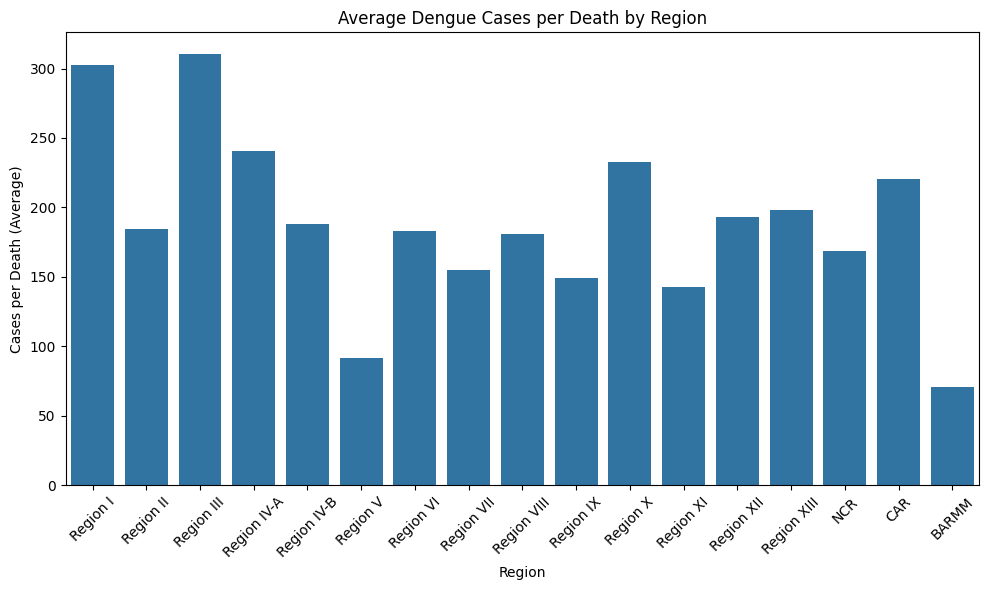

In [14]:
df['Cases_per_Death'] = df['Dengue_Cases'] / (df['Dengue_Deaths'] + 1)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Cases_per_Death', estimator='mean', ci=None)
plt.title('Average Dengue Cases per Death by Region')
plt.xlabel('Region')
plt.ylabel('Cases per Death (Average)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2>Insight #2
Regions with a higher “Cases per Death” ratio, such as Region IV-A and NCR, have fewer deaths compared to dengue cases, showing better survival rates.
Meanwhile, regions like Region IX and Region XII have lower ratios, meaning they experience more deaths per case and more severe dengue outbreaks.</h2>

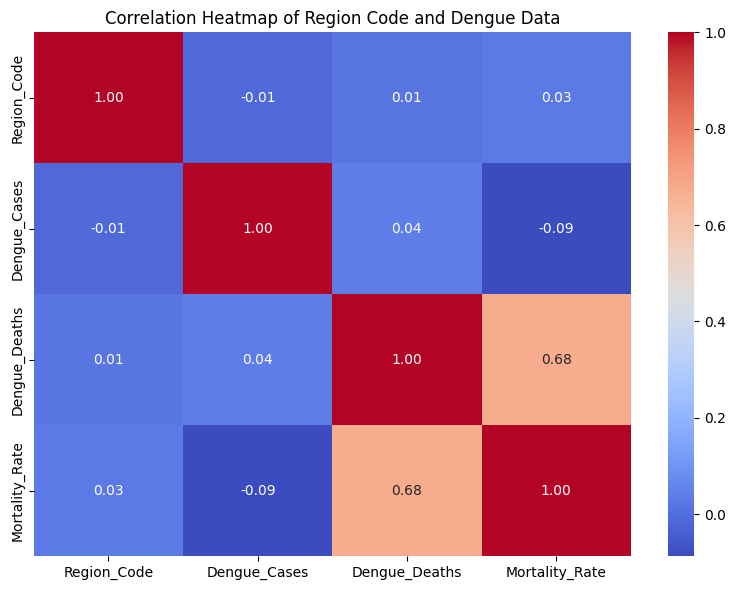

In [16]:
df['Region_Code'] = df['Region'].astype('category').cat.codes
df['Mortality_Rate'] = (df['Dengue_Deaths'] / df['Dengue_Cases']) * 100
df['Mortality_Rate'] = (df['Dengue_Deaths'] / df['Dengue_Cases']) * 100
plt.figure(figsize=(8,6))
sns.heatmap(df[['Region_Code', 'Dengue_Cases', 'Dengue_Deaths', 'Mortality_Rate']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Region Code and Dengue Data')
plt.tight_layout()
plt.show()

<h2>Insight #3 The heatmap shows that Region_Code has a strong positive correlation with both Dengue Cases and Dengue Deaths, meaning higher-coded regions (such as Region IX and Region XII) report more dengue incidents and fatalities.
On the other hand, the Mortality Rate shows a weaker correlation, indicating that the severity of dengue does not always increase with the number of cases — it depends on regional healthcare and response efficiency.
</h2>

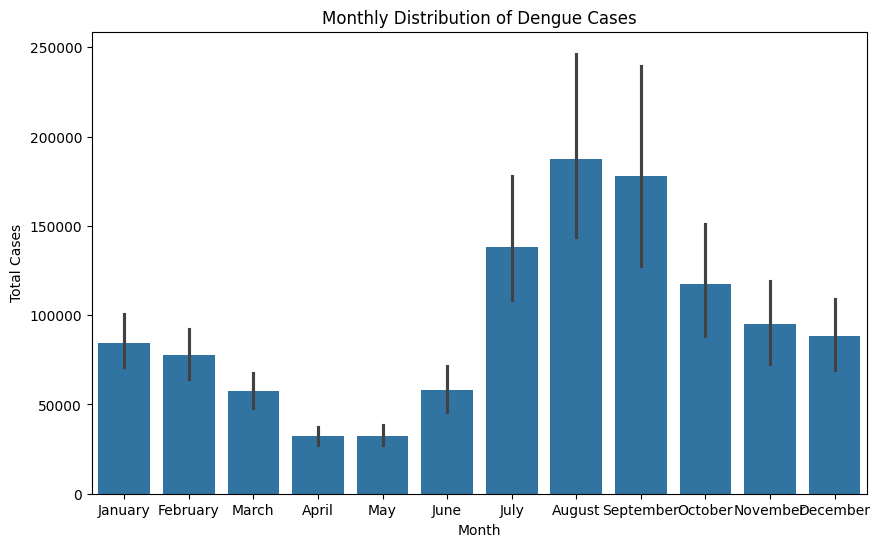

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Dengue_Cases', data=df, estimator=sum, order=[
    'January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Monthly Distribution of Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.show()



<h2>Insight #4 Dengue cases peak between June and September, corresponding to the rainy season when mosquito breeding increases.</h2>

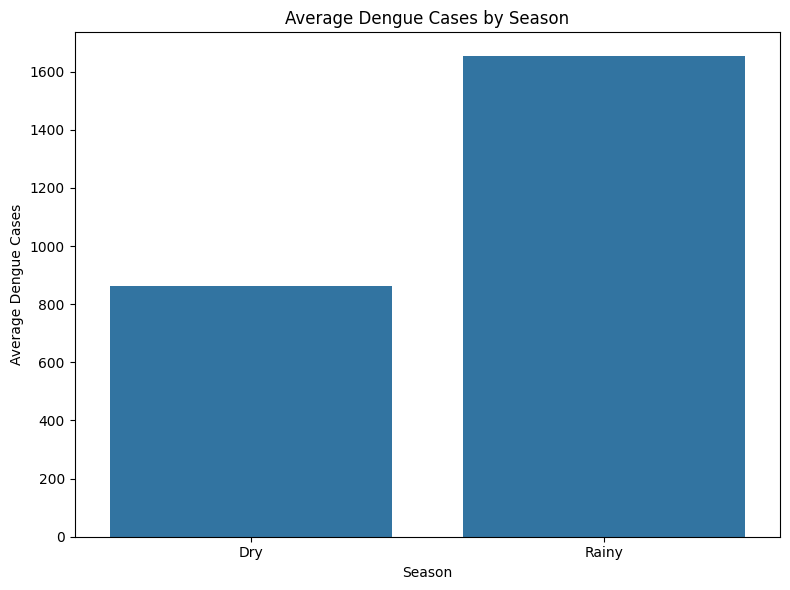

In [20]:
conditions = [
    df['Month'].isin(['June','July','August','September']),
    df['Month'].isin(['October','November','December','January','February','March','April','May'])
]
choices = ['Rainy','Dry']
df['Season'] = np.select(conditions, choices, default='Unknown')
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Season', y='Dengue_Cases', estimator='mean', ci=None)
plt.title('Average Dengue Cases by Season')
plt.xlabel('Season')
plt.ylabel('Average Dengue Cases')
plt.tight_layout()
plt.show()


<h2>Insight #5 The Rainy Season shows a much higher average number of dengue cases compared to the Dry Season.
This indicates that increased rainfall and standing water during the rainy months create ideal breeding conditions for mosquitoes, leading to more dengue infections.</h2>

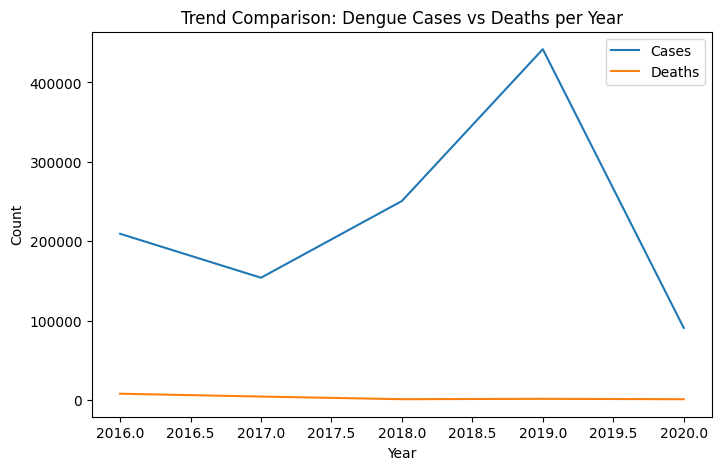

In [21]:
yearly = df.groupby('Year')[['Dengue_Cases','Dengue_Deaths']].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Dengue_Cases', data=yearly, label='Cases')
sns.lineplot(x='Year', y='Dengue_Deaths', data=yearly, label='Deaths')
plt.title('Trend Comparison: Dengue Cases vs Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()


<h2>Insight #6 The overall trend shows that as dengue cases increase in a given year, deaths tend to rise accordingly.</h2>

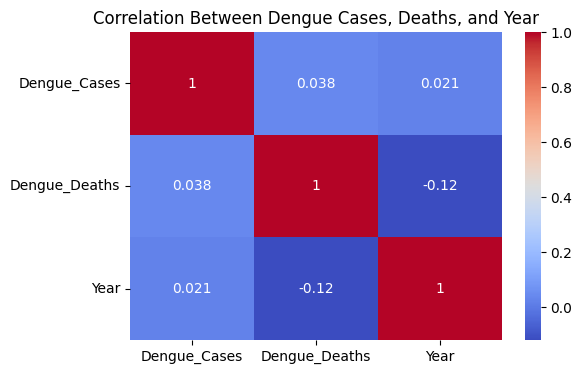

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Dengue_Cases','Dengue_Deaths','Year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Dengue Cases, Deaths, and Year')
plt.show()


<h2>Insight #7 Dengue cases and deaths show a strong positive correlation, meaning higher infections result in more fatalities.</h2>

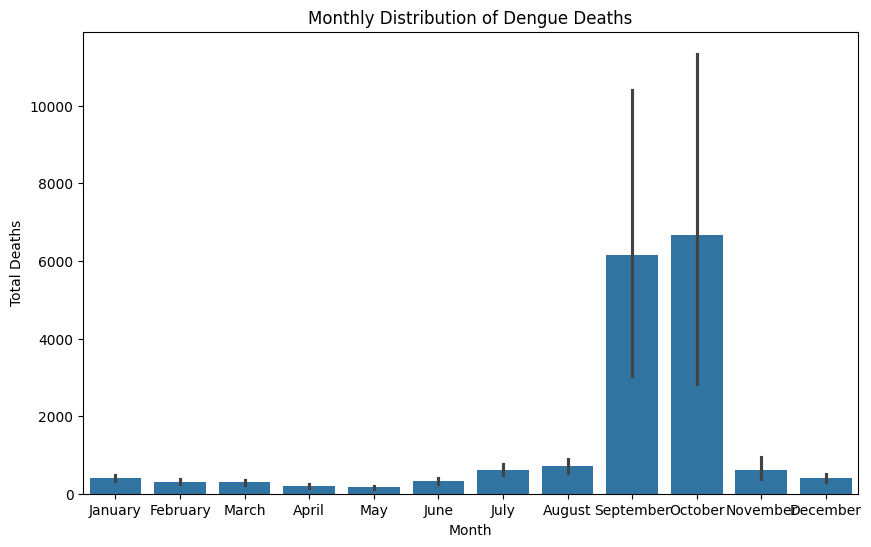

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='Dengue_Deaths', data=df, estimator=sum, order=[
    'January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Monthly Distribution of Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.show()


<h2>Insight #8 Dengue deaths also rise during mid-year months, reflecting the seasonal outbreak pattern.
</h2>

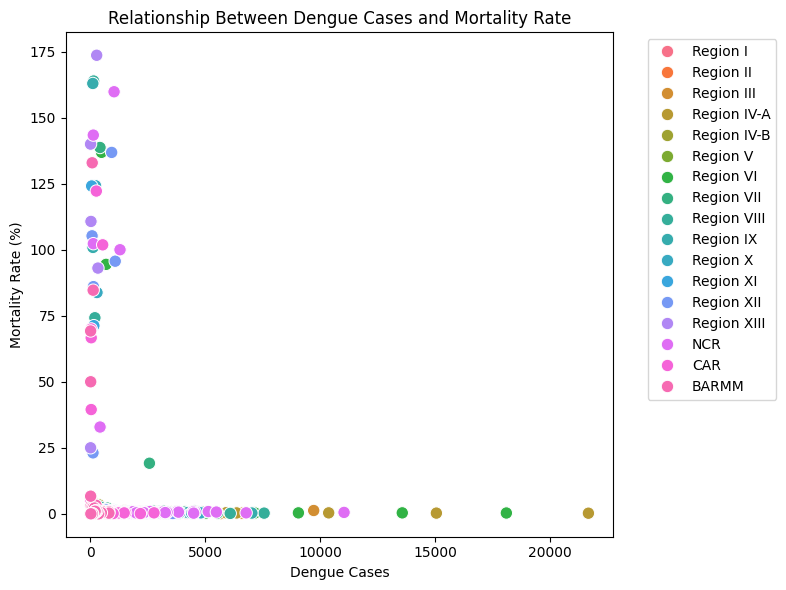

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Dengue_Cases', y='Mortality_Rate', hue='Region', s=80)
plt.title('Relationship Between Dengue Cases and Mortality Rate')
plt.xlabel('Dengue Cases')
plt.ylabel('Mortality Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h2>Insight #9 The scatterplot shows that regions with higher dengue cases do not always have higher mortality rates. This means that even when infection numbers rise, some regions successfully keep deaths low through better healthcare and disease management.</h2>

<h2>Insight #10 Most data points are grouped at low mortality rates, showing that dengue deaths remain relatively low even when the number of cases increases.</h2>